テキストの目的
教師あり学習（分類問題）の概観を知る
scikit-laernを使い分類を行えるようにする
手法の簡単な比較をする


【問題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。


virgicolorとvirginica
sepal_lengthとpetal_length

In [74]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

iris_dataset = load_iris()



#説明変数
iris_dataset_data = pd.DataFrame(iris_dataset.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
iris_dataset_all = pd.concat([iris_dataset_data], axis=1)
X = iris_dataset_all
# print(X)
print(type(X))
#目的変数（花の種類）も同様にyに格納してください。
iris_dataset_target = pd.DataFrame(iris_dataset.target, columns=["Species"])
iris_dataset_all2 = pd.concat([iris_dataset_target], axis=1)
y = iris_dataset_all2
print(type(y))
# print(y)

# df = pd.concat([X, y], axis=1)
# print(df)

#sepal_lengthとpetal_length
print("sepal_lengthとpetal_lengthのデータフレーム")
x=X.loc[:,['sepal_length','petal_length']]
print(type(x))
print(x)
# X.loc[50:149,['sepal_length','petal_length']]
# print(X.loc[50:149,['sepal_length','petal_length']])
# x = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
# print(x)
# print(df_concat['sepal_width'])

# x = x.loc[50:149, ["sepal_length", "petal_length"]]

# y = pd.Series(iris_dataset.target, name="y")
oldy=y[(y['Species'] == 1) | (y['Species'] == 2)]
print(type(oldy))
print(oldy)
# y = pd.DataFrame(iris_dataset.target, columns=["y"])

# print("virgicolorとvirginicaのデータフレーム")
# y = y[(y['y'] != 0)]
# print(y)
# print(y.shape)
# print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
sepal_lengthとpetal_lengthのデータフレーム
<class 'pandas.core.frame.DataFrame'>
     sepal_length  petal_length
0             5.1           1.4
1             4.9           1.4
2             4.7           1.3
3             4.6           1.5
4             5.0           1.4
..            ...           ...
145           6.7           5.2
146           6.3           5.0
147           6.5           5.2
148           6.2           5.4
149           5.9           5.1

[150 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
     Species
50         1
51         1
52         1
53         1
54         1
..       ...
145        2
146        2
147        2
148        2
149        2

[100 rows x 1 columns]


【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。


《実際の問題では？》


このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。


今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。



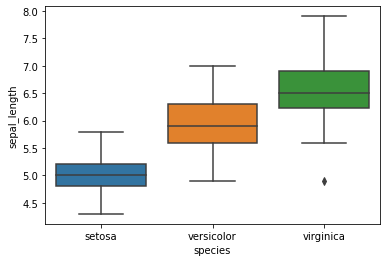

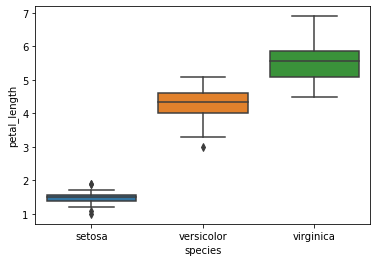

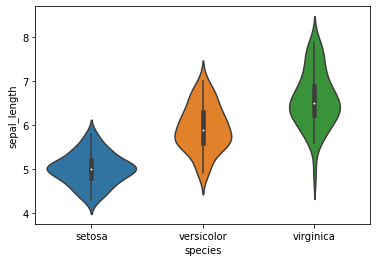

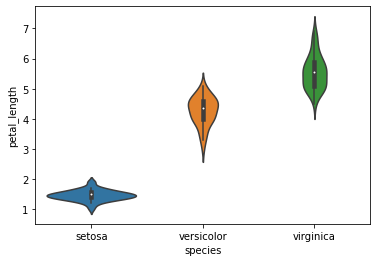

In [75]:
#箱ひげ図
import seaborn
import matplotlib.pyplot

import numpy as np
import matplotlib as mpl
# import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns

%matplotlib inline

iris = seaborn.load_dataset( 'iris' )
seaborn.boxplot(x=iris['species'], y=iris['sepal_length'])
matplotlib.pyplot.show()

seaborn.boxplot(x=iris['species'], y=iris['petal_length'])
matplotlib.pyplot.show()

# seaborn.boxplot(x=iris['species'], y=iris['virgicolor'])
# matplotlib.pyplot.show()

# seaborn.boxplot(x=iris['species'], y=iris['petal_length'])
matplotlib.pyplot.show()

#バイオリン図
import seaborn
import matplotlib.pyplot
iris = seaborn.load_dataset( 'iris' )

seaborn.violinplot( x=iris['species'], y=iris['sepal_length'] )
matplotlib.pyplot.show()

seaborn.violinplot( x=iris['species'], y=iris['petal_length'] )
matplotlib.pyplot.show()

# seaborn.violinplot( x=iris['species'], y=iris['virgicolor'] )
# matplotlib.pyplot.show()

# seaborn.violinplot( x=iris['species'], y=iris['virginica'] )
# matplotlib.pyplot.show()

前処理
データに加工をしていきます。


【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


《注意点》


データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。


《分割する理由》


分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。



In [76]:

#PandasのDataFrameをNumPyのndarrayに変換
print("sepal_lengthとpetal_lengthのndarray")
x=x.loc[50:149,['sepal_length','petal_length']]
print(type(x))
print(x)
print("xの型は")
print(type(x))
X = x.values
print(X)
print("Xの型は")
print(type(X))
# X_list=X.tolist()
# print(X_list)
# print("X_listの型は")
# print(type(X_list))


print("X2の型は")
print(type(X))
X=X.tolist()
print(X)

#PandasのDataFrameをNumPyのndarrayに変換
print("virgicolorとvirginicaのndarray")
oldy = oldy
# oldy = y[(y['y'] != 0)]
print(oldy)
print(oldy.shape)
print("oldyの型は")
print(type(oldy))
y = oldy.values
print("yの型は")
print(type(y))
#訓練データ75%、検証データ25%として分割
X_train, X_test, y_train, y_test = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
print("sepal_lengthとpetal_lengthの訓練データ")
print(X_train)
print("sepal_lengthとpetal_lengthの検証データ")
print(X_test)
print("virgicolorとvirginicaの訓練データ")
print(y_train)
print("virgicolorとvirginicaの検証データ")
print(y_test)

sepal_lengthとpetal_lengthのndarray
<class 'pandas.core.frame.DataFrame'>
     sepal_length  petal_length
50            7.0           4.7
51            6.4           4.5
52            6.9           4.9
53            5.5           4.0
54            6.5           4.6
..            ...           ...
145           6.7           5.2
146           6.3           5.0
147           6.5           5.2
148           6.2           5.4
149           5.9           5.1

[100 rows x 2 columns]
xの型は
<class 'pandas.core.frame.DataFrame'>
[[7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]
 [6.1 4.6]
 [5.8 4. ]
 [5.

【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


《注意点》


標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。また、今回は分類問題なので、ラベルについては標準化させる必要はありません。


《実際の問題での前処理は？》


アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、さまざまな加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [77]:
#標準化は「平均が0、標準偏差が1になるようにデータを加工（スケーリング）」し、正規化は「最低が0、最高が1になるようにデータを加工（スケーリング）する」モジュールと説明されています。
#標準化（standardization） と 正規化（normalization）
from sklearn.preprocessing import StandardScaler
# data = [[0, 0], [0, 0], [1, 1], [1, 1]]

#X_train, X_test, y_train, y_test

X_train_data = X_train #"sepal_lengthとpetal_lengthの訓練データ"
scaler = StandardScaler()
print(scaler.fit(X_train_data))
# print(scaler.mean_)
print(scaler.transform(X_train_data))

X_test_data = X_test #"sepal_lengthとpetal_lengthの検証データ"
scaler = StandardScaler()
print(scaler.fit(X_test_data))
# print(scaler.fit(X_test_data))
# print(scaler.mean_)
print(scaler.transform(X_test_data))


y_train_data = y_train #"virgicolorとvirginicaの訓練データ"
scaler = StandardScaler()
print(scaler.fit(y_train_data))
# print(scaler.mean_)
print(scaler.transform(y_train_data))

y_test_data = y_test #"virgicolorとvirginicaの検証データ"
scaler = StandardScaler()
print(scaler.fit(y_test_data))
# print(scaler.fit(y_test_data))
# print(scaler.mean_)
print(scaler.transform(y_test_data))


StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.59830424 -1.0108738 ]
 [-1.24628716 -0.48980483]
 [ 0.37367015  0.94313483]
 [ 2.47961467  2.3760745 ]
 [ 0.37367015  0.55233311]
 [ 0.85965735 -0.62007207]
 [ 0.85965735  1.07340207]
 [-1.89427009 -1.79247725]
 [ 0.21167442  0.03126414]
 [ 0.69766162 -0.35953759]
 [-0.27431277  0.16153138]
 [-0.9222957   0.03126414]
 [-2.05626582 -2.05301174]
 [ 1.66963601  1.20366932]
 [ 1.83163174  1.85500553]
 [-0.59830424  0.29179862]
 [-0.9222957  -0.48980483]
 [ 2.31761893  2.24580725]
 [-2.05626582 -0.48980483]
 [ 0.21167442  0.94313483]
 [ 0.21167442  0.16153138]
 [-0.27431277 -0.0990031 ]
 [ 1.02165308  0.81286759]
 [-0.59830424 -1.27140828]
 [-0.9222957  -1.66221001]
 [ 0.37367015 -0.75033931]
 [ 0.53566589  0.42206586]
 [-0.59830424  0.29179862]
 [ 0.85965735  0.16153138]
 [ 0.04967869 -0.48980483]
 [-0.76029997 -1.0108738 ]
 [ 1.18364881  0.03126414]
 [ 1.50764028  1.33393656]
 [-0.27431277 -0.48980483]
 [ 0.21167442  1.4642038 

【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。


sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation


学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。


パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [78]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(scaler.transform(X_train_data),y_train_data)
print(neigh.predict(scaler.transform(X_test_data)))#検証

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(scaler.transform(X_train_data),y_train_data)
print(neigh.predict(scaler.transform(X_test_data)))#検証

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(scaler.transform(X_train_data),y_train_data)
print(neigh.predict(scaler.transform(X_test_data)))#検証



[2 1 1 2 1 2 2 2 2 2 1 1 1 2 1 1 1 1 1 2 2 1 1 2 2]
[2 1 1 2 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 2 1 1 2 2]
[2 1 1 2 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 2 1 1 2 2]


【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


scikit-learnを使い4種類の指標を計算する
混同行列をscikit-learnを使い表示する
4種類の指標値の意味について簡単に調査して文章でまとめる

sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation


sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation


sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation


sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation


sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation

Accuracy（正解率）・・・全予測正答率

・すべてのサンプルのうち正解したサンプルの割合

Precision（適合率）・・・正予測の正答率

・陽性と予測されたサンプルのうち正解したサンプルの割合。PPV（positive predictive value）とも呼ばれる。

Recall（再現率）・・・正に対する正答率

・実際に陽性のサンプルのうち正解したサンプルの割合。
sensitivityやhit rate, 
TPR（true positive rate, 
真陽性率）などとも呼ばれる。

F値 ・・・適合率と再現率の調和平均。

・適合率と再現率の調和平均。 単純にF値（F-measure, F-score）と呼ばれることもある。

In [79]:
#scikit-learnを使い4種類の指標を計算する
#正解率（accuracy）: accuracy_score()
from sklearn.metrics import accuracy_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

print(accuracy_score(y_true, y_pred))
# 0.3

#適合率（precision）: precision_score()
from sklearn.metrics import precision_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

print(precision_score(y_true, y_pred))
# 0.3333333333333333

#再現率（recall）: recall_score()
from sklearn.metrics import recall_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

print(recall_score(y_true, y_pred))
# 0.4

#F1値（F1-measure）: f1_score()
from sklearn.metrics import f1_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

print(f1_score(y_true, y_pred))
# 0.3636363636363636

from sklearn.metrics import classification_report
import pandas as pd
import pprint


y_true_multi = [0, 0, 0, 1, 1, 1, 2, 2, 2]
y_pred_multi = [0, 1, 1, 1, 1, 2, 2, 2, 2]
#混同行列をscikit-learnを使い表示する
print(classification_report(y_true_multi, y_pred_multi))



#               precision    recall  f1-score   support
# 
#            0       1.00      0.33      0.50         3
#            1       0.50      0.67      0.57         3
#            2       0.75      1.00      0.86         3
# 
#    micro avg       0.67      0.67      0.67         9
#    macro avg       0.75      0.67      0.64         9
# weighted avg       0.75      0.67      0.64         9

from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)
# array([[2, 0, 0],
#        [0, 0, 1],
#        [1, 0, 2]])

0.3
0.3333333333333333
0.4
0.3636363636363636
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      0.67      0.57         3
           2       0.75      1.00      0.86         3

    accuracy                           0.67         9
   macro avg       0.75      0.67      0.64         9
weighted avg       0.75      0.67      0.64         9



array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。



import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

3-nnの決定領域を表示した例が以下です。


Image from Gyazo
この例では訓練データをプロットし、どのように学習したかを見ています。一方で、検証データをプロットすればどういった特徴量のものが間違って分類されたかを見ることができます。



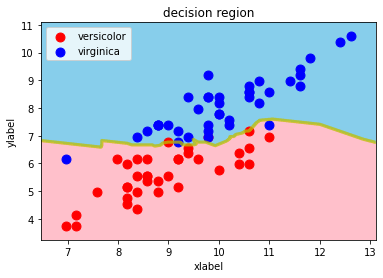

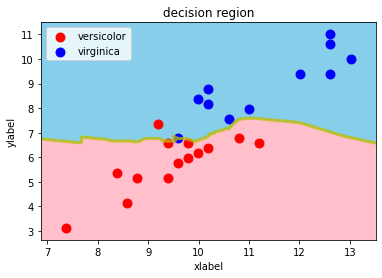

In [80]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
import itertools
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

#訓練データをプロット
# X_train_data_list = list(itertools.chain.from_iterable(X_train_data))
# print(X_train_data_list)
X1=scaler.transform(X_train_data)
# print(X1)
y1=list(itertools.chain.from_iterable(y_train_data))
# print(y1)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
model = neigh.fit(X1,y1)
decision_region(X1, y1, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
X2=scaler.transform(X_test_data)
# print(X2)
y2=list(itertools.chain.from_iterable(y_test_data))
# print(y2)
decision_region(X2, y2, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])


手法の改善
実際の問題では指標値や可視化を元に手法を改善していきますが、この課題では扱いません。


4.各手法の比較

他の手法も基本的な流れは同様です。他の手法でも学習から可視化までを行っていきます。


【問題8】他の手法の学習
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


最近傍法
ロジスティック回帰
SVM
決定木
ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。


sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation
sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVC — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation

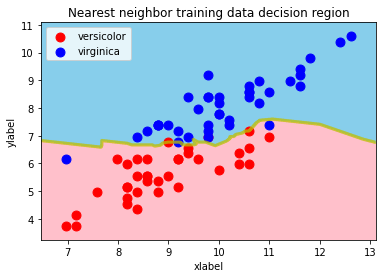

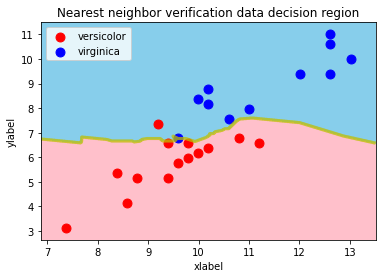

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.85      0.92        13

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



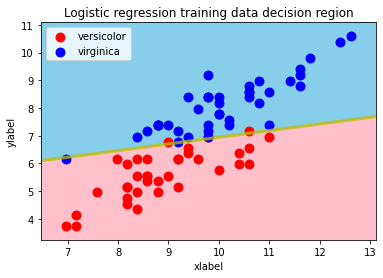

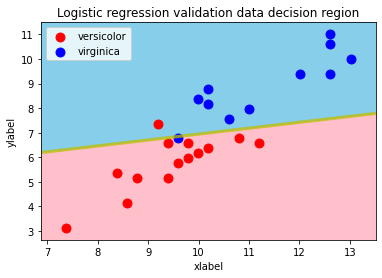

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25



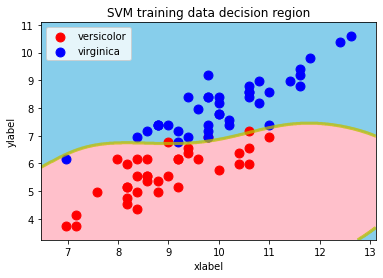

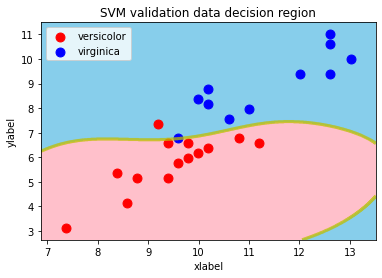

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



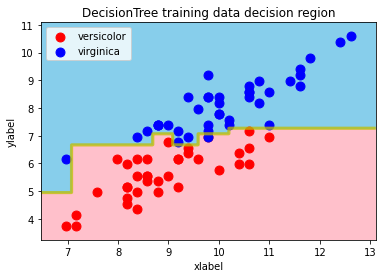

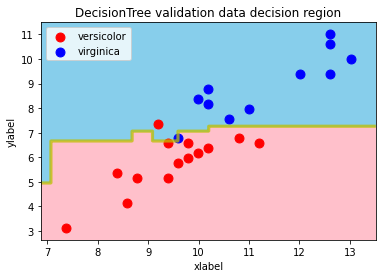

              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           2       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



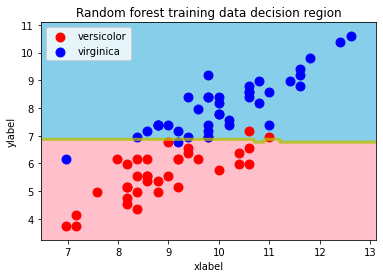

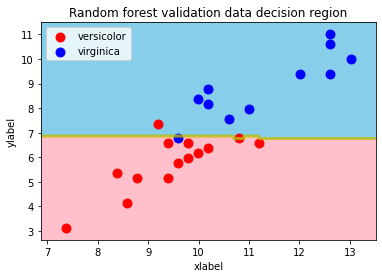

              precision    recall  f1-score   support

           1       0.50      0.50      0.50        14
           2       0.36      0.36      0.36        11

    accuracy                           0.44        25
   macro avg       0.43      0.43      0.43        25
weighted avg       0.44      0.44      0.44        25



In [81]:
#最近傍法 
#訓練データをプロット
# X_train_data_list = list(itertools.chain.from_iterable(X_train_data))
# print(X_train_data_list)
X1_1=scaler.transform(X_train_data)
# print(X1_1)
y1_1=list(itertools.chain.from_iterable(y_train_data))
# print(y1_1)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
model = neigh.fit(X1_1,y1_1)
decision_region(X1_1, y1_1, model, step=0.01, title='Nearest neighbor training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X1_2=scaler.transform(X_test_data)
# print(X1_2)
y1_2=list(itertools.chain.from_iterable(y_test_data))
# print(y1_2)
decision_region(X1_2, y1_2, model, step=0.01, title='Nearest neighbor verification data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint

#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train, X_test, y_train, y_test = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh = KNeighborsClassifier(n_neighbors=3)
# lerning
# clf.fit(data_train, target_train)
model = neigh.fit(X_train,y_train)
# preedict test data
# predict = clf.predict(data_test)
predict = model.predict(X_test)
# checking answer
y_true_multi1=y_test
y_pred_multi1=predict
print(classification_report(y_true_multi1, y_pred_multi1)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))


#ロジスティック回帰 
#訓練データをプロット
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X2_1=scaler.transform(X_train_data)
y2_1=list(itertools.chain.from_iterable(y_train_data))
# X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X2_1, y2_1)
# clf.predict(X[:2, :])
# array([0, 0])
# clf.predict_proba(X[:2, :])
# array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
#        [9.7...e-01, 2.8...e-02, ...e-08]])
# clf.score(X, y)
# print(clf.score(X, y))
#0.97...

model2 = clf.fit(X2_1,y2_1)
decision_region(X2_1, y2_1, model2, step=0.01, title='Logistic regression training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X2_2=scaler.transform(X_test_data)
# print(X2_2)
y2_2=list(itertools.chain.from_iterable(y_test_data))
# print(y2_2)
decision_region(X2_2, y2_2, model2, step=0.01, title='Logistic regression validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train2, X_test2, y_train2, y_test2 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh2 = LogisticRegression()
# lerning
# clf.fit(data_train, target_train)
model2 = neigh2.fit(X_train2,y_train2)
# preedict test data
# predict = clf.predict(data_test)
predict2 = model2.predict(X_test2)
# checking answer
y_true_multi2=y_test2
y_pred_multi2=predict2
print(classification_report(y_true_multi2, y_pred_multi2)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))





#SVM 
#訓練データをプロット
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
X3_1=scaler.transform(X_train_data)
y3_1=list(itertools.chain.from_iterable(y_train_data))
from sklearn.svm import SVC
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model3=clf3.fit(X3_1, y3_1)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svc', SVC(gamma='auto'))])
# print(clf.predict([[-0.8, -1]]))
decision_region(X3_1, y3_1, model3, step=0.01, title='SVM training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X3_2=scaler.transform(X_test_data)
# print(X2_2)
y3_2=list(itertools.chain.from_iterable(y_test_data))
# print(y2_2)
decision_region(X3_2, y3_2, model3, step=0.01, title='SVM validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train3, X_test3, y_train3, y_test3 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# lerning
# clf.fit(data_train, target_train)
model3 = neigh3.fit(X_train3,y_train3)
# preedict test data
# predict = clf.predict(data_test)
predict3 = model3.predict(X_test3)
# checking answer
y_true_multi3=y_test3
y_pred_multi3=predict3
print(classification_report(y_true_multi3, y_pred_multi3)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))



#決定木 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(random_state=0)
# iris = load_iris()
# cross_val_score(clf, iris.data, iris.target, cv=10)

# array([ 1.     ,  0.93...,  0.86...,  0.93...,  0.93...,
#         0.93...,  0.93...,  1.     ,  0.93...,  1.      ])
#訓練データをプロット
X4_1=scaler.transform(X_train_data)
y4_1=list(itertools.chain.from_iterable(y_train_data))
clf4 = DecisionTreeClassifier()
model4 = clf4.fit(X4_1, y4_1)
decision_region(X4_1, y4_1, model4, step=0.01, title='DecisionTree training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X4_2=scaler.transform(X_test_data)
# print(X2_2)
y4_2=list(itertools.chain.from_iterable(y_test_data))
# print(y2_2)
decision_region(X4_2, y4_2, model4, step=0.01, title='DecisionTree validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])


from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train4, X_test4, y_train4, y_test4 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh4 = DecisionTreeClassifier()
# lerning
# clf.fit(data_train, target_train)
model4 = neigh4.fit(X_train4,y_train4)
# preedict test data
# predict = clf.predict(data_test)
predict4 = model4.predict(X_test4)
# checking answer
y_true_multi4=y_test4
y_pred_multi4=predict4
print(classification_report(y_true_multi4, y_pred_multi4)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))





#ランダムフォレスト
#訓練データをプロット
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
X5_1=scaler.transform(X_train_data)
y5_1=list(itertools.chain.from_iterable(y_train_data))
clf5 = RandomForestClassifier(max_depth=2, random_state=0)
model5=clf5.fit(X5_1, y5_1)
RandomForestClassifier(...)
# print(clf.predict([[0, 0, 0, 0]]))
# [1]

# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svc', SVC(gamma='auto'))])
# print(clf.predict([[-0.8, -1]]))
decision_region(X5_1, y5_1, model5, step=0.01, title='Random forest training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X5_2=scaler.transform(X_test_data)
# print(X2_2)
y5_2=list(itertools.chain.from_iterable(y_test_data))
# print(y2_2)
decision_region(X5_2, y5_2, model5, step=0.01, title='Random forest validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train5, X_test5, y_train5, y_test5 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh5 = RandomForestClassifier(max_depth=2, random_state=0)
# lerning
# clf.fit(data_train, target_train)
model5= neigh5.fit(X_train,y_train)
# preedict test data
# predict = clf.predict(data_test)
predict5 = model5.predict(X_test)
# checking answer
y_true_multi5=y_test5
y_pred_multi5=predict5
print(classification_report(y_true_multi5, y_pred_multi5)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))



以下１と２は、
１・・・virgicolor
２・・・virginica
である。

○最近傍法 
【良かった指標値】

・２のprecisionと１のrecallが良かった。

【決定領域】

・２種が分類できている。

・virginicaの一部データがversicolorに入っていた。

・２種を分断する線は、曲線である。


○ロジスティック回帰 
【良かった指標値】

・１と２のprecision、recall、f1-scoreは、全て高い値であった。

【決定領域】

・２種が分類できている。

・２種を分断する線が一直線である。


○SVM 
【良かった指標値】

・１と２のprecision、recall、f1-scoreは、全て高い値であった。

【決定領域】

・２種が分類できている。

・２種を分断する線は、曲線である。



○決定木
【良かった指標値】

・１と２のprecision、recall、f1-scoreは、全て高い値であった。

【決定領域】

・２種が分類できている。

・２種を分断する線は、階段形状である。一部青領域に
入っている所があった。



○ランダムフォレスト
【良かった指標値】

・良かった指標値は無い。どれも約０.５位であった。

【決定領域】

・２種が分類できている。

・２種を分断する線は、曲線である。



《実際の問題では？》


ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。


【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。



(75, 2)


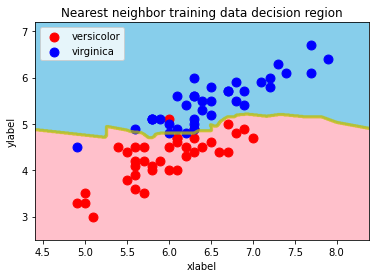

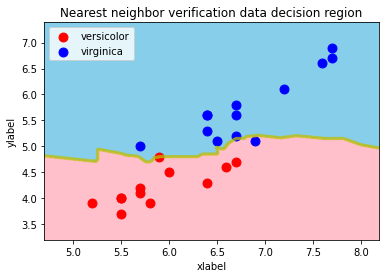

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



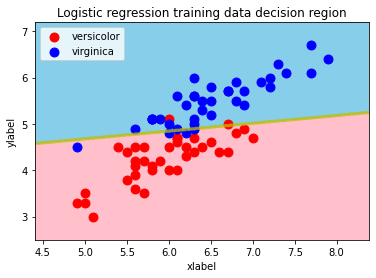

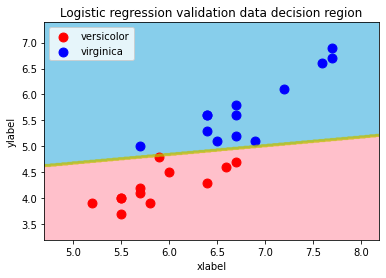

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       1.00      0.77      0.87        13

    accuracy                           0.88        25
   macro avg       0.90      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25



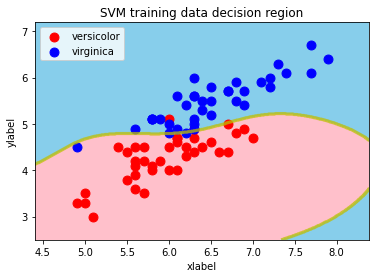

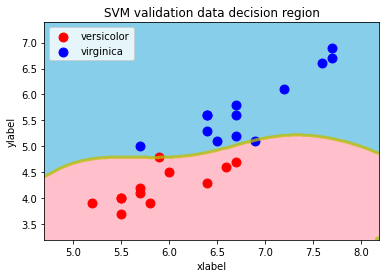

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.93      1.00      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



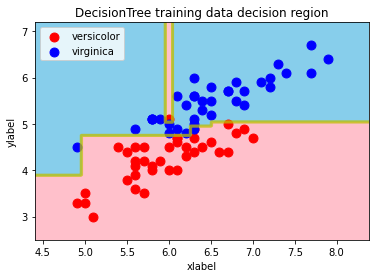

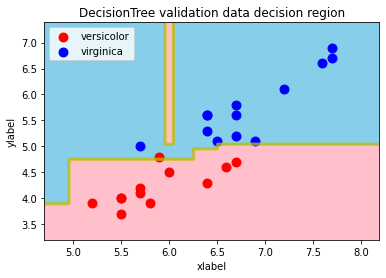

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        13
           2       0.83      0.83      0.83        12

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25



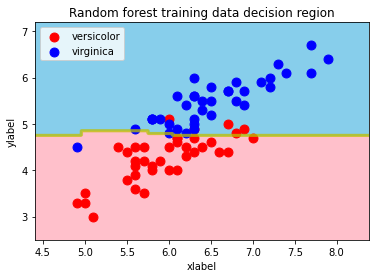

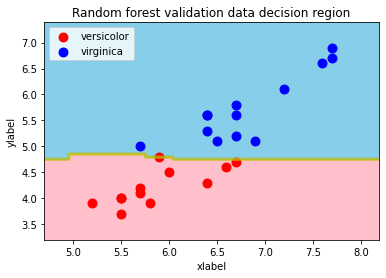

              precision    recall  f1-score   support

           1       0.64      0.58      0.61        12
           2       0.64      0.69      0.67        13

    accuracy                           0.64        25
   macro avg       0.64      0.64      0.64        25
weighted avg       0.64      0.64      0.64        25



In [82]:
#最近傍法 
from sklearn.metrics import classification_report
import pandas as pd
import pprint
#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train, X_test, y_train, y_test = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
#訓練データをプロット
# X_train_data_list = list(itertools.chain.from_iterable(X_train_data))
# print(X_train_data_list)
# X1_1=scaler.transform(X_train_data)
X1_1=np.array(X_train)
print(X1.shape)
# print(X1_1)
# y1_1=list(itertools.chain.from_iterable(y_train_data))
y1_1=list(itertools.chain.from_iterable(y_train))

# print(y1_1)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
model = neigh.fit(X1_1,y1_1)
decision_region(X1_1, y1_1, model, step=0.01, title='Nearest neighbor training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
# X1_2=scaler.transform(X_test_data)
X1_2=np.array(X_test)
# print(X1_2)
# y1_2=list(itertools.chain.from_iterable(y_test_data))
y1_2=list(itertools.chain.from_iterable(y_test))
# print(y1_2)
decision_region(X1_2, y1_2, model, step=0.01, title='Nearest neighbor verification data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

# NN learning
#clf = MLPClassifier()
neigh = KNeighborsClassifier(n_neighbors=3)
# lerning
# clf.fit(data_train, target_train)
model = neigh.fit(X_train,y_train)
# preedict test data
# predict = clf.predict(data_test)
predict = model.predict(X_test)
# checking answer
y_true_multi1=y_test
y_pred_multi1=predict
print(classification_report(y_true_multi1, y_pred_multi1)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))


#ロジスティック回帰 
#訓練データをプロット
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X2_1=np.array(X_train)
y2_1=list(itertools.chain.from_iterable(y_train))
# X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X2_1, y2_1)
# clf.predict(X[:2, :])
# array([0, 0])
# clf.predict_proba(X[:2, :])
# array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
#        [9.7...e-01, 2.8...e-02, ...e-08]])
# clf.score(X, y)
# print(clf.score(X, y))
#0.97...

model2 = clf.fit(X2_1,y2_1)
decision_region(X2_1, y2_1, model2, step=0.01, title='Logistic regression training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X2_2=np.array(X_test)
# print(X2_2)
y2_2=list(itertools.chain.from_iterable(y_test))
# print(y2_2)
decision_region(X2_2, y2_2, model2, step=0.01, title='Logistic regression validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train2, X_test2, y_train2, y_test2 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh2 = LogisticRegression()
# lerning
# clf.fit(data_train, target_train)
model2 = neigh2.fit(X_train2,y_train2)
# preedict test data
# predict = clf.predict(data_test)
predict2 = model2.predict(X_test2)
# checking answer
y_true_multi2=y_test2
y_pred_multi2=predict2
print(classification_report(y_true_multi2, y_pred_multi2)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))





#SVM 
#訓練データをプロット
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
X3_1=np.array(X_train)
y3_1=list(itertools.chain.from_iterable(y_train))
from sklearn.svm import SVC
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model3=clf3.fit(X3_1, y3_1)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svc', SVC(gamma='auto'))])
# print(clf.predict([[-0.8, -1]]))
decision_region(X3_1, y3_1, model3, step=0.01, title='SVM training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X3_2=np.array(X_test)
# print(X2_2)
y3_2=list(itertools.chain.from_iterable(y_test))
# print(y2_2)
decision_region(X3_2, y3_2, model3, step=0.01, title='SVM validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train3, X_test3, y_train3, y_test3 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# lerning
# clf.fit(data_train, target_train)
model3 = neigh3.fit(X_train3,y_train3)
# preedict test data
# predict = clf.predict(data_test)
predict3 = model3.predict(X_test3)
# checking answer
y_true_multi3=y_test3
y_pred_multi3=predict3
print(classification_report(y_true_multi3, y_pred_multi3)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))



#決定木 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(random_state=0)
# iris = load_iris()
# cross_val_score(clf, iris.data, iris.target, cv=10)

# array([ 1.     ,  0.93...,  0.86...,  0.93...,  0.93...,
#         0.93...,  0.93...,  1.     ,  0.93...,  1.      ])
#訓練データをプロット
X4_1=np.array(X_train)
y4_1=list(itertools.chain.from_iterable(y_train))
clf4 = DecisionTreeClassifier()
model4 = clf4.fit(X4_1, y4_1)
decision_region(X4_1, y4_1, model4, step=0.01, title='DecisionTree training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X4_2=np.array(X_test)
# print(X2_2)
y4_2=list(itertools.chain.from_iterable(y_test))
# print(y2_2)
decision_region(X4_2, y4_2, model4, step=0.01, title='DecisionTree validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])


from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train4, X_test4, y_train4, y_test4 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh4 = DecisionTreeClassifier()
# lerning
# clf.fit(data_train, target_train)
model4 = neigh4.fit(X_train4,y_train4)
# preedict test data
# predict = clf.predict(data_test)
predict4 = model4.predict(X_test4)
# checking answer
y_true_multi4=y_test4
y_pred_multi4=predict4
print(classification_report(y_true_multi4, y_pred_multi4)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))





#ランダムフォレスト
#訓練データをプロット
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
X5_1=np.array(X_train)
y5_1=list(itertools.chain.from_iterable(y_train))
clf5 = RandomForestClassifier(max_depth=2, random_state=0)
model5=clf5.fit(X5_1, y5_1)
RandomForestClassifier(...)
# print(clf.predict([[0, 0, 0, 0]]))
# [1]

# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svc', SVC(gamma='auto'))])
# print(clf.predict([[-0.8, -1]]))
decision_region(X5_1, y5_1, model5, step=0.01, title='Random forest training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X5_2=np.array(X_test)
# print(X2_2)
y5_2=list(itertools.chain.from_iterable(y_test))
# print(y2_2)
decision_region(X5_2, y5_2, model5, step=0.01, title='Random forest validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train5, X_test5, y_train5, y_test5 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh5 = RandomForestClassifier(max_depth=2, random_state=0)
# lerning
# clf.fit(data_train, target_train)
model5= neigh5.fit(X_train,y_train)
# preedict test data
# predict = clf.predict(data_test)
predict5 = model5.predict(X_test)
# checking answer
y_true_multi5=y_test5
y_pred_multi5=predict5
print(classification_report(y_true_multi5, y_pred_multi5)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))



標準化した方がしない場合と比較すると、赤と青領域を分ける線の形状が異なる。より、２つを分離する方向あると思われる。また、５つの手法全てにおいて、指標値の数値が標準化した方が高い。

【問題10】（アドバンス課題）すべての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類すべてを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。


《多値になることでの変更点》


指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。


決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です。



sepal_lengthとpetal_lengthのデータフレーム


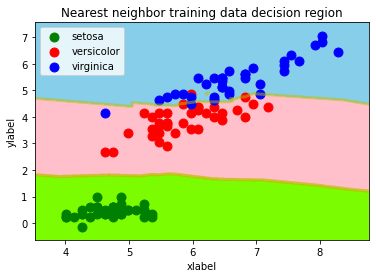

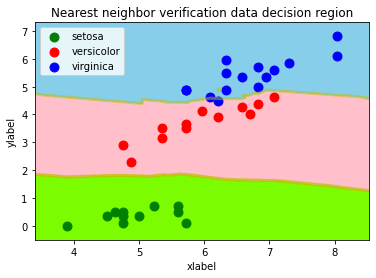

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



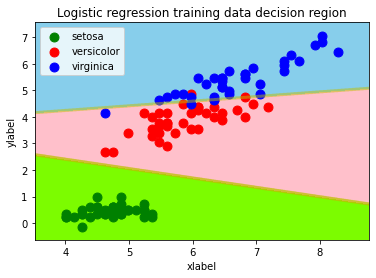

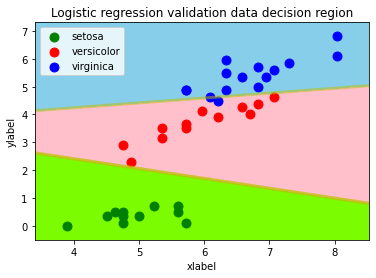

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.83      0.87        12
           2       0.82      0.90      0.86        10

    accuracy                           0.92        38
   macro avg       0.91      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38



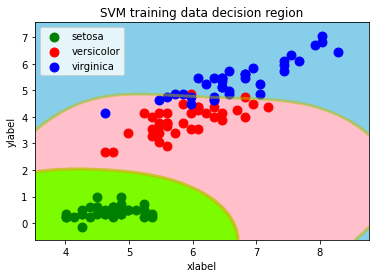

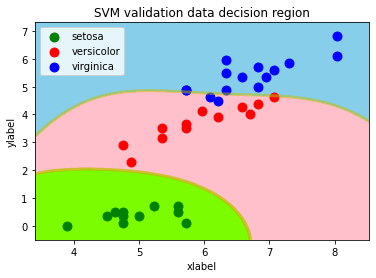

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.80      1.00      0.89         8
           2       1.00      0.86      0.92        14

    accuracy                           0.95        38
   macro avg       0.93      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



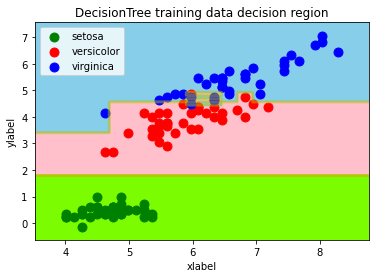

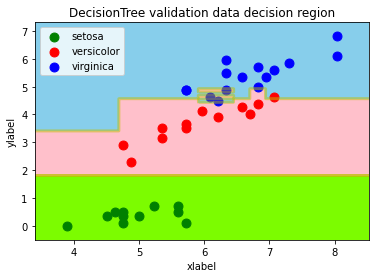

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38



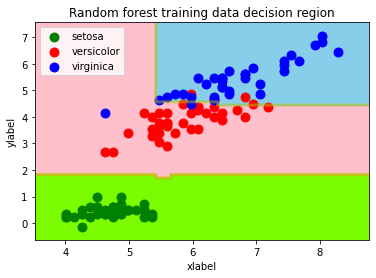

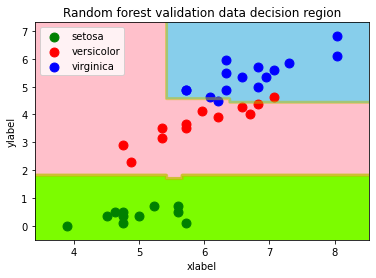

              precision    recall  f1-score   support

           0       0.25      0.30      0.27        10
           1       0.50      0.47      0.48        15
           2       0.33      0.31      0.32        13

    accuracy                           0.37        38
   macro avg       0.36      0.36      0.36        38
weighted avg       0.38      0.37      0.37        38



In [83]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica']):
    """
    3値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green','red', 'blue']
    contourf_color = ['lawngreen','pink', 'skyblue']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

iris_dataset = load_iris()



#説明変数
iris_dataset_data = pd.DataFrame(iris_dataset.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
iris_dataset_all = pd.concat([iris_dataset_data], axis=1)
X = iris_dataset_all
# print(X)
# print(type(X))
#目的変数（花の種類）も同様にyに格納してください。
iris_dataset_target = pd.DataFrame(iris_dataset.target, columns=["Species"])
iris_dataset_all2 = pd.concat([iris_dataset_target], axis=1)
y = iris_dataset_all2
# print(type(y))

print("sepal_lengthとpetal_lengthのデータフレーム")
x=X.loc[:,['sepal_length','petal_length']]
# print(type(x))
# print(x)
X_train_data=x

oldy2=y
# print(type(oldy2))
# print(oldy2)

y_train_data=oldy2

X = x.values
# print(X)
# print("Xの型は")
# print(type(X))
# X_list=X.tolist()
# print(X_list)
# print("X_listの型は")
# print(type(X_list))


# print("X2の型は")
# print(type(X))
X=X.tolist()
# print(X)

y = oldy2.values




#訓練データ75%、検証データ25%として分割
X_train, X_test, y_train, y_test = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# print("sepal_lengthとpetal_lengthの訓練データ")
# print(X_train)
# print("sepal_lengthとpetal_lengthの検証データ")
# print(X_test)
# print("virgicolorとvirginicaの訓練データ")
# print(y_train)
# print("virgicolorとvirginicaの検証データ")
# print(y_test)

from sklearn.preprocessing import StandardScaler
# data = [[0, 0], [0, 0], [1, 1], [1, 1]]

#X_train, X_test, y_train, y_test

X_train_data = X_train #"sepal_lengthとpetal_lengthの訓練データ"
scaler = StandardScaler()
scaler.fit(X_train_data)
# print(scaler.fit(X_train_data))
# print(scaler.mean_)
scaler.transform(X_train_data)
# print(scaler.transform(X_train_data))

X_test_data = X_test #"sepal_lengthとpetal_lengthの検証データ"
scaler = StandardScaler()
scaler.fit(X_test_data)
# print(scaler.fit(X_test_data))
# print(scaler.fit(X_test_data))
# print(scaler.mean_)
scaler.transform(X_test_data)
# print(scaler.transform(X_test_data))


y_train_data = y_train #"virgicolorとvirginicaの訓練データ"
scaler = StandardScaler()
scaler.fit(y_train_data)
# print(scaler.fit(y_train_data))
# print(scaler.mean_)
scaler.transform(y_train_data)
# print(scaler.transform(y_train_data))

y_test_data = y_test #"virgicolorとvirginicaの検証データ"
scaler = StandardScaler()
scaler.fit(y_test_data)
# print(scaler.fit(y_test_data))
scaler.transform(y_test_data)
# print(scaler.transform(y_test_data))


#最近傍法 
#訓練データをプロット
# X_train_data_list = list(itertools.chain.from_iterable(X_train_data))
# print(X_train_data_list)
X1_1=scaler.transform(X_train_data)
# print(X1_1)
y1_1=list(itertools.chain.from_iterable(y_train_data))
# y1_1=y_train_data
# print(y1_1)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
model = neigh.fit(X1_1,y1_1)
decision_region2(X1_1, y1_1, model, step=0.01, title='Nearest neighbor training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X1_2=scaler.transform(X_test_data)
# print(X1_2)
y1_2=list(itertools.chain.from_iterable(y_test_data))
# print(y1_2)
decision_region2(X1_2, y1_2, model, step=0.01, title='Nearest neighbor verification data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint

#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train, X_test, y_train, y_test = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh = KNeighborsClassifier(n_neighbors=3)
# lerning
# clf.fit(data_train, target_train)
model = neigh.fit(X_train,y_train)
# preedict test data
# predict = clf.predict(data_test)
predict = model.predict(X_test)
# checking answer
y_true_multi1=y_test
y_pred_multi1=predict
print(classification_report(y_true_multi1, y_pred_multi1)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))


#ロジスティック回帰 
#訓練データをプロット
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X2_1=scaler.transform(X_train_data)
y2_1=list(itertools.chain.from_iterable(y_train_data))
# X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X2_1, y2_1)
# clf.predict(X[:2, :])
# array([0, 0])
# clf.predict_proba(X[:2, :])
# array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
#        [9.7...e-01, 2.8...e-02, ...e-08]])
# clf.score(X, y)
# print(clf.score(X, y))
#0.97...

model2 = clf.fit(X2_1,y2_1)
decision_region2(X2_1, y2_1, model2, step=0.01, title='Logistic regression training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X2_2=scaler.transform(X_test_data)
# print(X2_2)
y2_2=list(itertools.chain.from_iterable(y_test_data))
# print(y2_2)
decision_region2(X2_2, y2_2, model2, step=0.01, title='Logistic regression validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train2, X_test2, y_train2, y_test2 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh2 = LogisticRegression()
# lerning
# clf.fit(data_train, target_train)
model2 = neigh2.fit(X_train2,y_train2)
# preedict test data
# predict = clf.predict(data_test)
predict2 = model2.predict(X_test2)
# checking answer
y_true_multi2=y_test2
y_pred_multi2=predict2
print(classification_report(y_true_multi2, y_pred_multi2)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))





#SVM 
#訓練データをプロット
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
X3_1=scaler.transform(X_train_data)
y3_1=list(itertools.chain.from_iterable(y_train_data))
from sklearn.svm import SVC
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model3=clf3.fit(X3_1, y3_1)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svc', SVC(gamma='auto'))])
# print(clf.predict([[-0.8, -1]]))
decision_region2(X3_1, y3_1, model3, step=0.01, title='SVM training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X3_2=scaler.transform(X_test_data)
# print(X2_2)
y3_2=list(itertools.chain.from_iterable(y_test_data))
# print(y2_2)
decision_region2(X3_2, y3_2, model3, step=0.01, title='SVM validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train3, X_test3, y_train3, y_test3 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# lerning
# clf.fit(data_train, target_train)
model3 = neigh3.fit(X_train3,y_train3)
# preedict test data
# predict = clf.predict(data_test)
predict3 = model3.predict(X_test3)
# checking answer
y_true_multi3=y_test3
y_pred_multi3=predict3
print(classification_report(y_true_multi3, y_pred_multi3)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))



#決定木 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(random_state=0)
# iris = load_iris()
# cross_val_score(clf, iris.data, iris.target, cv=10)

# array([ 1.     ,  0.93...,  0.86...,  0.93...,  0.93...,
#         0.93...,  0.93...,  1.     ,  0.93...,  1.      ])
#訓練データをプロット
X4_1=scaler.transform(X_train_data)
y4_1=list(itertools.chain.from_iterable(y_train_data))
clf4 = DecisionTreeClassifier()
model4 = clf4.fit(X4_1, y4_1)
decision_region2(X4_1, y4_1, model4, step=0.01, title='DecisionTree training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X4_2=scaler.transform(X_test_data)
# print(X2_2)
y4_2=list(itertools.chain.from_iterable(y_test_data))
# print(y2_2)
decision_region2(X4_2, y4_2, model4, step=0.01, title='DecisionTree validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])


from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train4, X_test4, y_train4, y_test4 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh4 = DecisionTreeClassifier()
# lerning
# clf.fit(data_train, target_train)
model4 = neigh4.fit(X_train4,y_train4)
# preedict test data
# predict = clf.predict(data_test)
predict4 = model4.predict(X_test4)
# checking answer
y_true_multi4=y_test4
y_pred_multi4=predict4
print(classification_report(y_true_multi4, y_pred_multi4)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))





#ランダムフォレスト
#訓練データをプロット
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
X5_1=scaler.transform(X_train_data)
y5_1=list(itertools.chain.from_iterable(y_train_data))
clf5 = RandomForestClassifier(max_depth=2, random_state=0)
model5=clf5.fit(X5_1, y5_1)
RandomForestClassifier(...)
# print(clf.predict([[0, 0, 0, 0]]))
# [1]

# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svc', SVC(gamma='auto'))])
# print(clf.predict([[-0.8, -1]]))
decision_region2(X5_1, y5_1, model5, step=0.01, title='Random forest training data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

#検証データをプロット
# X_test_data_list = list(itertools.chain.from_iterable(X_test_data))
# print(X_test_data_list)
X5_2=scaler.transform(X_test_data)
# print(X2_2)
y5_2=list(itertools.chain.from_iterable(y_test_data))
# print(y2_2)
decision_region2(X5_2, y5_2, model5, step=0.01, title='Random forest validation data decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica'])

from sklearn.metrics import classification_report
import pandas as pd
import pprint


#cross_validation
# data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)
#訓練データ75%、検証データ25%として分割
X_train5, X_test5, y_train5, y_test5 = train_test_split(
X, y, train_size= 0.75, test_size=0.25)
# NN learning
#clf = MLPClassifier()
neigh5 = RandomForestClassifier(max_depth=2, random_state=0)
# lerning
# clf.fit(data_train, target_train)
model5= neigh5.fit(X_train,y_train)
# preedict test data
# predict = clf.predict(data_test)
predict5 = model5.predict(X_test)
# checking answer
y_true_multi5=y_test5
y_pred_multi5=predict5
print(classification_report(y_true_multi5, y_pred_multi5)) #引数に入れるのは、下記でサイトで調べた
#左がtarget_test（ターゲット（目的関数）の検証データ）, predict（元のデータから予測した値）

#  # preedict test data
#     predict = clf.predict(data_test)
#     # checking answer
#     print(classification_report(target_test, predict))



3種類すべてを使った多値分類で、学習と推定、評価を行って、最も精度の高い手法は、ロジスティック回帰である。